## Importing Libraries

In [1]:
import pandas as pd
import emoji
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [2]:
df=pd.read_csv(r"C:\Users\THOTA CHANDRASEKHAR\Downloads\Machine Learning\restaurant_reviews.csv")

In [3]:
df

,Review
0,An exceptional dining experience! The flavors ...
1,The menu is a symphony of flavors that take yo...
2,"From appetizers to desserts, the balance of fl..."
3,"The ambiance is charming, and the food is noth..."
4,This restaurant is a hidden gem! The dishes ar...
5,A feast for the senses! The flavors were bold ...
6,The fusion of different cuisines is done seaml...
7,This restaurant not only serves delectable dis...
8,"As a vegan, I'm thrilled to have found a resta..."
9,The cozy atmosphere of this restaurant adds to...


## Count of the Data

In [4]:
def reviews (data,column):
    count=0
    count=data[column].apply(lambda x: count+emoji.emoji_count(x)).sum()  #emoji count in data
    lower=data[column].str.islower().sum()
    url=data[column].apply(lambda x: True if re.search(r"www.\S+| https ?://\S+",x) else False).sum()
    tags=data[column].apply(lambda x: True if re.search(r"<[^>]>+",x) else False).sum()
    marks=data[column].apply(lambda x: True if re.search(r"[^a-zA-Z0-9]",x) else False).sum()
    digits=data[column].apply(lambda x: True if re.search(r"[0-9]",x) else False).sum()
    return pd.Series({"Emoji":count,"lower case":lower,"urls":url,"HTML Tags":tags,"Punctuation":marks,"Numbers":digits})

In [5]:
reviews(df,"Review")

Emoji           0
lower case      0
urls            0
HTML Tags       0
Punctuation    20
Numbers         0
dtype: int64

## Removing Punctuations

In [6]:
def review (x):
    x=re.sub(r"[^a-zA-Z0-9]"," ",x)
    return x

In [7]:
df["Review"].apply(review)

0     An exceptional dining experience  The flavors ...
1     The menu is a symphony of flavors that take yo...
2     From appetizers to desserts  the balance of fl...
3     The ambiance is charming  and the food is noth...
4     This restaurant is a hidden gem  The dishes ar...
5     A feast for the senses  The flavors were bold ...
6     The fusion of different cuisines is done seaml...
7     This restaurant not only serves delectable dis...
8     As a vegan  I m thrilled to have found a resta...
9     The cozy atmosphere of this restaurant adds to...
10    The brunch menu is a delightful assortment of ...
11    Save room for dessert  The sweet offerings her...
12    The staff here is attentive and knowledgeable ...
13    If you re a fan of authentic flavors  this is ...
14    This restaurant is a romantic haven  The dim l...
15    Kudos to the restaurant for its commitment to ...
16    The menu is a journey through exotic flavors  ...
17    The restaurant s late night menu is a savi

## Stemming

In [8]:
from nltk.stem import PorterStemmer

In [9]:
porter=PorterStemmer()

In [10]:
def stem_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    stemmed_tokens = [porter.stem(word) for word in tokens]  # Apply Porter stemming to each word
    return ' '.join(stemmed_tokens)  # Join the stemmed tokens back into a string

In [11]:
df["Review"]= df['Review'].apply(stem_text)

## Lemmaitization

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text into words
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization to each word
    return ' '.join(lemmatized_tokens) 

In [14]:
df["Review"]=df['Review'].apply(lemmatize_text)

In [15]:
df

,Review
0,an except dine experi ! the flavor danc on my ...
1,the menu is a symphoni of flavor that take you...
2,"from appet to dessert , the balanc of flavor w..."
3,"the ambianc is charm , and the food is noth sh..."
4,thi restaur is a hidden gem ! the dish are pre...
5,a feast for the sen ! the flavor were bold and...
6,the fusion of differ cuisin is done seamlessli...
7,thi restaur not onli serv delect dish but also...
8,"a a vegan , i 'm thrill to have found a restau..."
9,the cozi atmospher of thi restaur add to the c...


## Vectorization

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vector=CountVectorizer()

In [18]:
numeric=vector.fit_transform(df["Review"]).toarray()

In [19]:
numeric

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
pd.DataFrame(numeric,columns=vector.get_feature_names_out())

,abil,about,ad,add,adventur,after,again,also,ambianc,an,...,were,while,who,wholesom,win,with,work,world,you,your
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,2,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


## Text Visualization

In [21]:
df["Review"]

0     an except dine experi ! the flavor danc on my ...
1     the menu is a symphoni of flavor that take you...
2     from appet to dessert , the balanc of flavor w...
3     the ambianc is charm , and the food is noth sh...
4     thi restaur is a hidden gem ! the dish are pre...
5     a feast for the sen ! the flavor were bold and...
6     the fusion of differ cuisin is done seamlessli...
7     thi restaur not onli serv delect dish but also...
8     a a vegan , i 'm thrill to have found a restau...
9     the cozi atmospher of thi restaur add to the c...
10    the brunch menu is a delight assort of sweet a...
11    save room for dessert ! the sweet offer here a...
12    the staff here is attent and knowledg . they e...
13    if you 're a fan of authent flavor , thi is th...
14    thi restaur is a romant haven . the dim light ...
15    kudo to the restaur for it commit to sustain ....
16    the menu is a journey through exot flavor . ea...
17    the restaur 's late-night menu is a savior

In [22]:
text=' '.join(df["Review"])

In [23]:
text

"an except dine experi ! the flavor danc on my palat , and each dish wa a masterpiec . the attent to detail in present and tast wa commend . a must-visit for food enthusiast . the menu is a symphoni of flavor that take your tast bud on a delight journey . everi dish is thought craft , and the fusion of ingredi is pure geniu . i left with a happi heart and a satisfi stomach . from appet to dessert , the balanc of flavor wa impecc . the chef 's expertis shine through in everi bite . the atmospher ad to the overal enjoy . a fantast place for those who appreci fine dine . the ambianc is charm , and the food is noth short of extraordinari . the innov menu offer a varieti of option , each better than the last . i ca n't wait to return and savor these delight dish again . thi restaur is a hidden gem ! the dish are prepar with precis and care . the staff is friendli and knowledg about the menu . i stumbl upon a culinari treasur , and i ca n't recommend it enough . a feast for the sen ! the fla

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

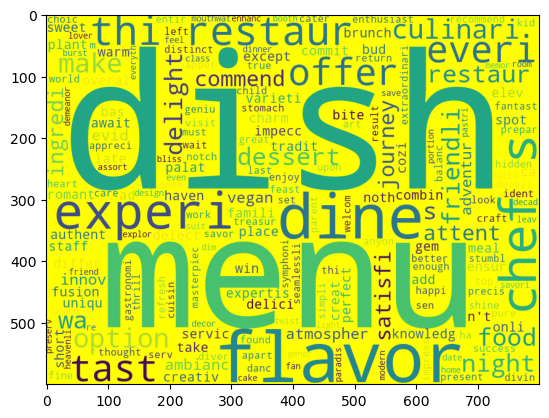

In [25]:
data=WordCloud(width=800,height=600,background_color="yellow").generate(text)
plt.imshow(data)

In [27]:
data.count("data")/len(data.split())

AttributeError: 'WordCloud' object has no attribute 'count'

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tf=TfidfVectorizer(ngram_range=(1,1),stop_words=("english"),max_features=10)

In [36]:
vector = tf.fit_transform(df["Review"])

In [37]:
pd.DataFrame(vector.toarray(),columns=tf.get_feature_names_out())

,chef,culinari,dine,dish,everi,experi,flavor,menu,restaur,thi
0,0.000000,0.000000,0.561264,0.323959,0.000000,0.602491,0.465873,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.349544,0.650074,0.000000,0.502666,0.450054,0.000000,0.000000
2,0.510226,0.000000,0.510226,0.000000,0.547704,0.000000,0.423509,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.613396,0.000000,0.000000,0.000000,0.789775,0.000000,0.000000
4,0.000000,0.601260,0.000000,0.299091,0.000000,0.000000,0.000000,0.385093,0.406578,0.485209
5,0.000000,0.000000,0.561264,0.323959,0.000000,0.602491,0.465873,0.000000,0.000000,0.000000
6,0.000000,0.765906,0.000000,0.380992,0.000000,0.000000,0.000000,0.000000,0.517913,0.000000
7,0.000000,0.000000,0.000000,0.374307,0.000000,0.000000,0.000000,0.481937,0.508825,0.607230
8,0.000000,0.000000,0.000000,0.390027,0.000000,0.000000,0.560883,0.502178,0.530194,0.000000
9,0.000000,0.000000,0.000000,0.427191,0.000000,0.000000,0.000000,0.000000,0.580714,0.693022
